In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import time
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Employee-Attrition.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [5]:
# 1. Data Preprocessing
# 1.1 Drop Unnecessary Columns
data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
# # 1.2 Handle Missing Values
# Check for missing values
print(data.isnull().sum())
# Drop rows with missing values
data.dropna(inplace=True)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [9]:
# Convert categorical variables to numeric using label encoding for categorical features

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and apply label encoding
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical
        data[column] = label_encoder.fit_transform(data[column])


In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [11]:
 #Write the preprocessed data to a new CSV file
#data.to_csv('Employee-Attrition-Preprocessed.csv', index=False)

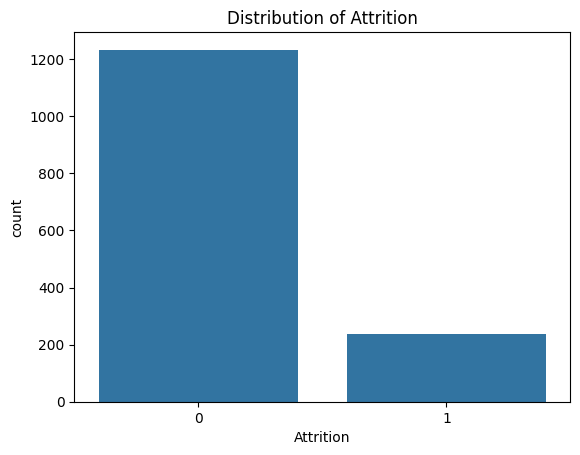

In [12]:
#Exploratory Data Analysis
# 1. Distribution of Attrition
sns.countplot(x='Attrition', data=data)
plt.title('Distribution of Attrition')
plt.show()

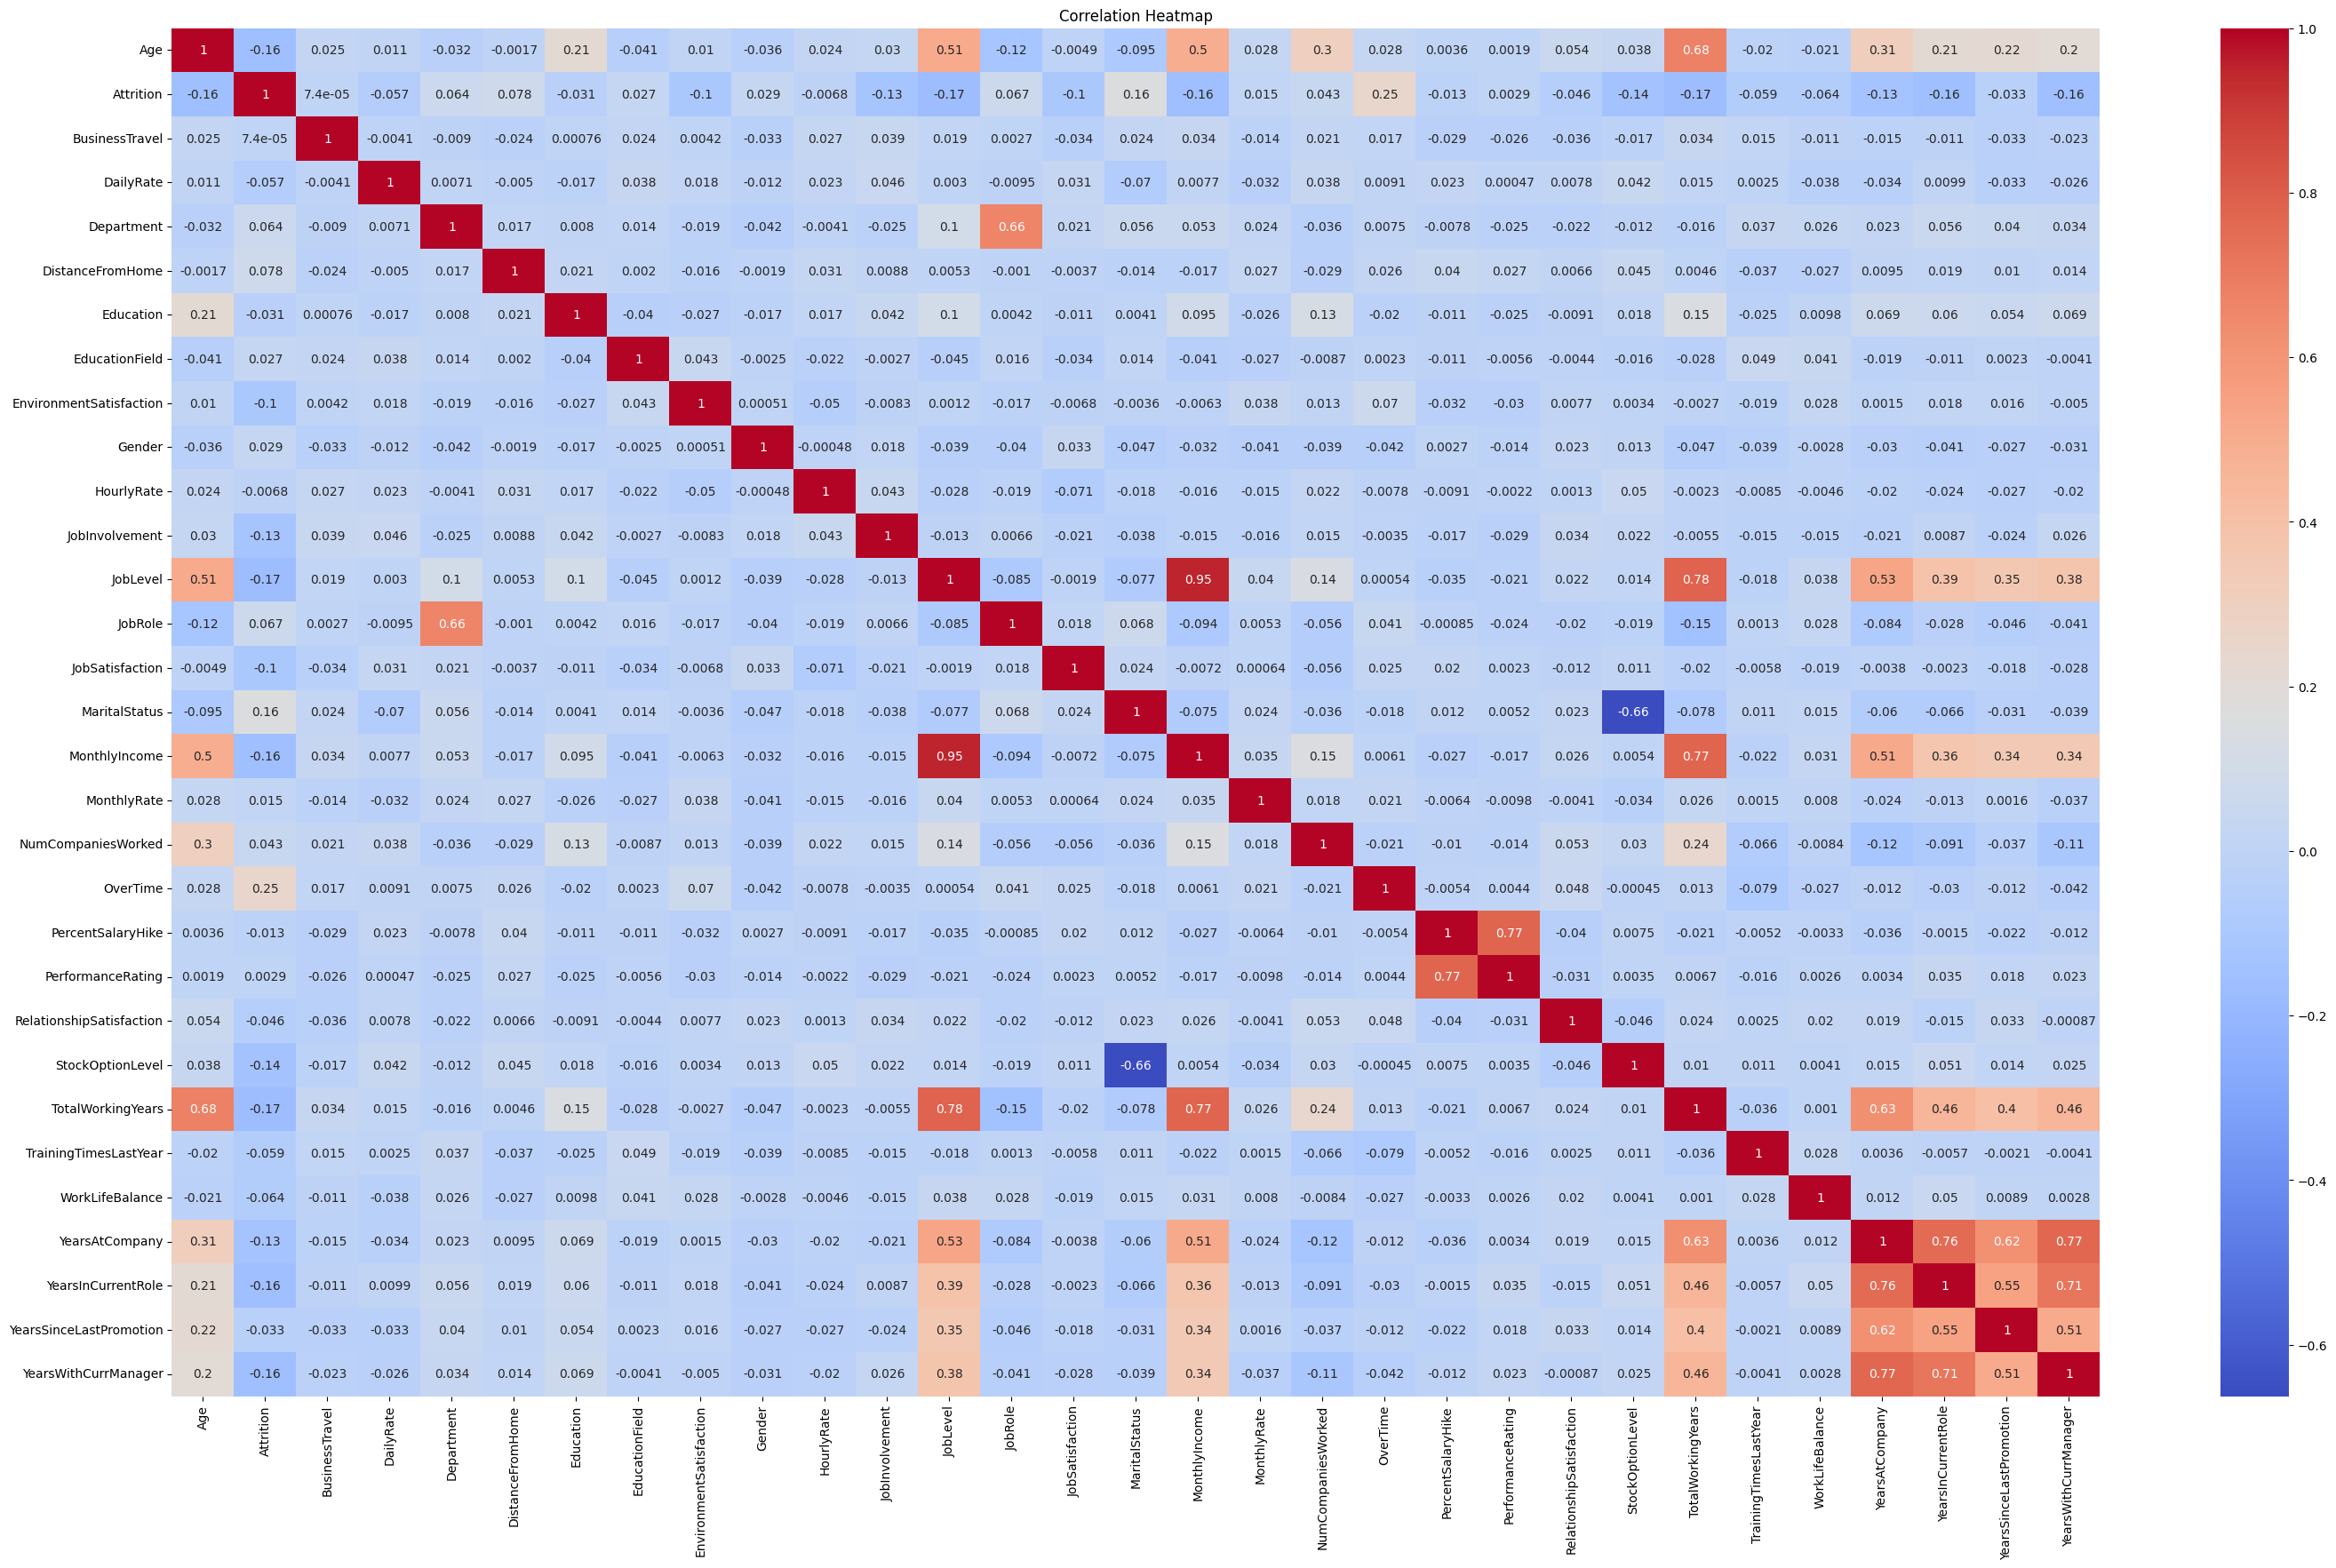

In [13]:

# 2. Correlation Heatmap
plt.figure(figsize=(35, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

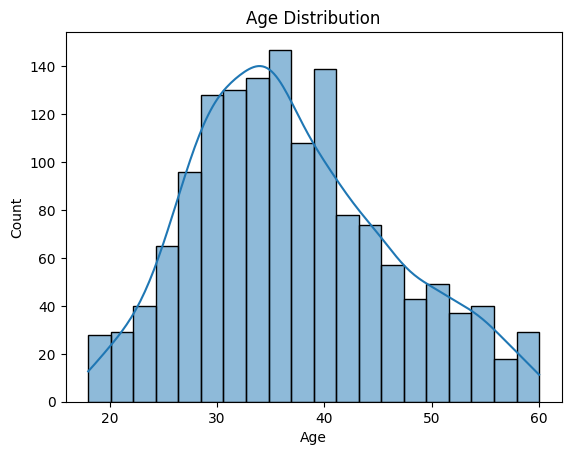

In [14]:
# 3. Distribution of Age
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

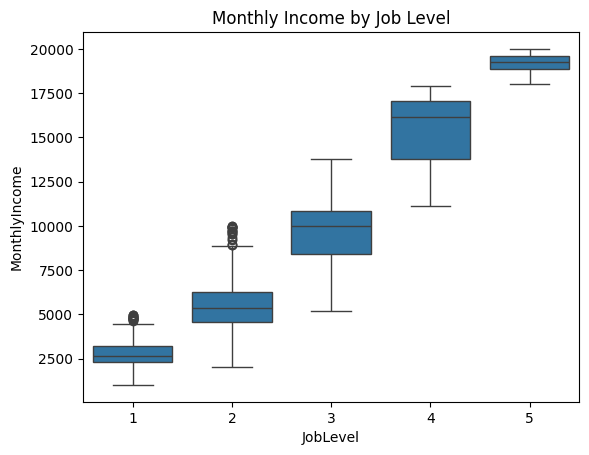

In [15]:
# 4. Boxplot of Monthly Income by Job Level
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Job Level')
plt.show()

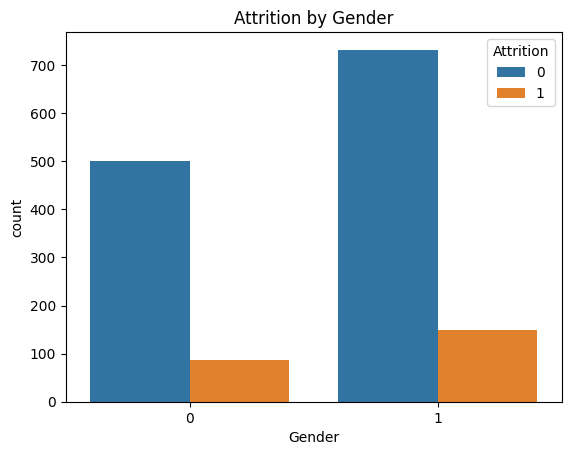

In [16]:
# 5. Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition by Gender')
plt.show()

In [17]:
# 2. Feature Selection
# Select features and target variable  
features = ['Age','Department', 'DistanceFromHome','EducationField','EnvironmentSatisfaction','Gender', 'JobRole','JobSatisfaction', 
            'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime','PerformanceRating','TotalWorkingYears','PercentSalaryHike']
target = 'Attrition'

X = data[features]  # Features
y = data[target]    # Target 
#Handle Imbalanced Data using Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
# Print the number of samples in each class after resampling
print("Resampled dataset shape:", Counter(y_resampled))


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)
#normalize the data for monthlt rate


# 3. Data Normalization
# Initialize MinMaxScaler
scaler = MinMaxScaler()
#Normalize the data for DailyRate MonthlyIncome MonthlyRate
X_train[['Age','Department', 'DistanceFromHome','EducationField','EnvironmentSatisfaction', 'Gender', 'JobRole','JobSatisfaction',
            'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime','PerformanceRating','TotalWorkingYears','PercentSalaryHike']] = scaler.fit_transform(X_train[['Age','Department', 'DistanceFromHome','EducationField','EnvironmentSatisfaction','Gender', 'JobRole','JobSatisfaction',
            'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating','TotalWorkingYears','PercentSalaryHike']])

X_test= scaler.transform(X_test)

Resampled dataset shape: Counter({0: 237, 1: 237})


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        47
           1       0.74      0.65      0.69        48

    accuracy                           0.71        95
   macro avg       0.71      0.71      0.70        95
weighted avg       0.71      0.71      0.70        95



c:\Users\kichu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(70.72222222222221, 0.5, 'Actual')

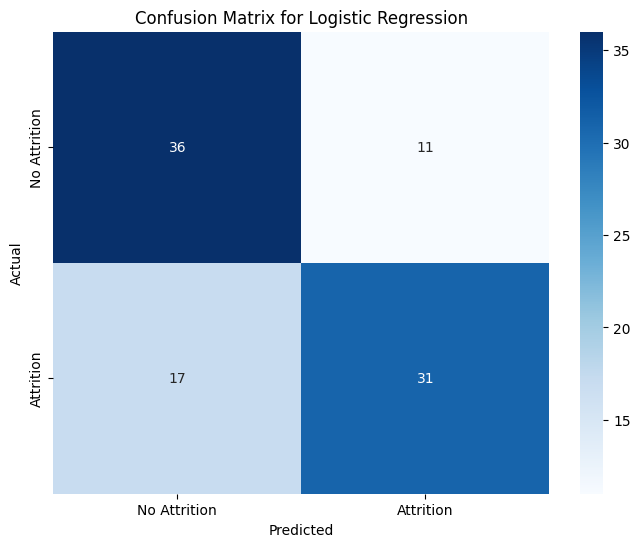

In [19]:
#LogisticRegression
logistic_model = LogisticRegression()
# Fit the model
logistic_model.fit(X_train, y_train)
# Make predictions
y_pred = logistic_model.predict(X_test)
# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [20]:
# 6. Save the Model

joblib.dump(logistic_model, 'employee_attrition_model.pkl')


['employee_attrition_model.pkl']

In [21]:
# 7. Load the Model
loaded_model = joblib.load('employee_attrition_model.pkl')

AUC-ROC Score: 0.7058953900709221


c:\Users\kichu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


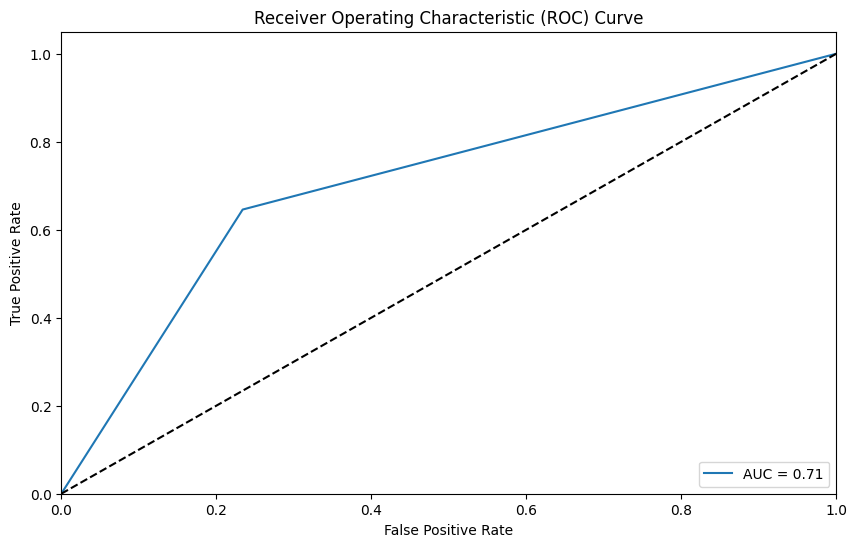

In [22]:
#AUC-ROC
# Calculate AUC-ROC

y_pred = loaded_model.predict(X_test)
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))
# Plot ROC Curve
plt.figure(figsize=(10, 6))
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

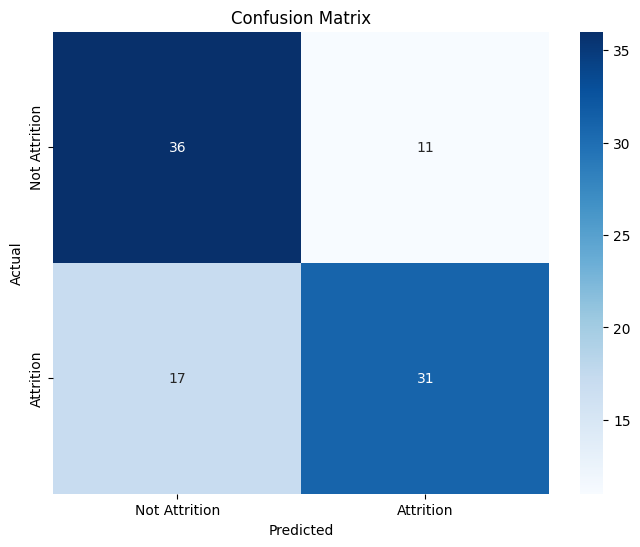

In [23]:
#Confusion Matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrition', 'Attrition'], yticklabels=['Not Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
X_test = pd.DataFrame(X_test, columns=features)
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# Concatenate the features and predictions
results_df = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)
# Save the results to a CSV file

In [25]:
# 8. Make Predictions with the Loaded Model
# Sample data for prediction
# Make predictions on the test set
sample_data = X_test.iloc[:10]  # Sample data for prediction
predictions = loaded_model.predict(sample_data)
predictions = np.round(predictions)  # Round predictions to nearest integer
predictions_df = pd.DataFrame(predictions, columns=['Predicted Attrition'])
predictions_df['Actual Attrition'] = y_test.iloc[:10].values
predictions_df['Correct Prediction'] = predictions_df['Predicted Attrition'] == predictions_df['Actual Attrition']
# Display predictions
print(predictions_df)




   Predicted Attrition  Actual Attrition  Correct Prediction
0                    1                 1                True
1                    0                 1               False
2                    1                 0               False
3                    1                 1                True
4                    1                 0               False
5                    0                 0                True
6                    0                 1               False
7                    1                 1                True
8                    0                 0                True
9                    0                 0                True


In [ ]:
# 2. Feature Selection
# Select features and target variable  
features = ['Age','Department','Education','EducationField','JobInvolvement','JobLevel','MonthlyIncome','PercentSalaryHike','YearsAtCompany', 'YearsInCurrentRole',
            'YearsWithCurrManager']
target = 'PerformanceRating'

X = data[features]  # Features
y = data[target]    # Target '

#Handle Imbalanced Data using Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
# Print the number of samples in each class after resampling
print("Resampled dataset shape:", Counter(y_resampled))

Resampled dataset shape: Counter({3: 226, 4: 226})


In [ ]:
# 3. Model Training
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=123)



In [112]:
#LazyPredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 161, number of negative: 155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509494 -> initscore=0.037979
[LightGBM] [Info] Start training from score 0.037979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

KNeighbors Classifier Classification Report:
              precision    recall  f1-score   support

           3       0.55      0.58      0.57        71
           4       0.52      0.49      0.50        65

    accuracy                           0.54       136
   macro avg       0.54      0.53      0.53       136
weighted avg       0.54      0.54      0.54       136



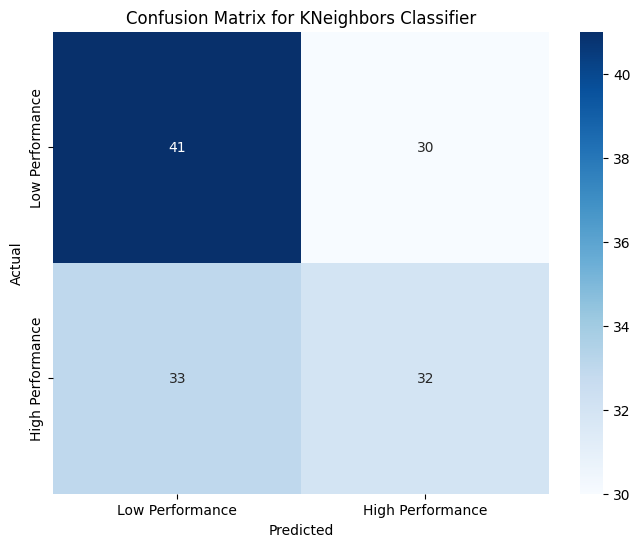

In [109]:
#Kneighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
# Fit the model
knn_model.fit(X_train, y_train)
# Make predictions
y_pred = knn_model.predict(X_test)
# Evaluate the model
print("KNeighbors Classifier Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Performance', 'High Performance'], yticklabels=['Low Performance', 'High Performance'])
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [ ]:
#AUC-ROC of KNeighbors Classifier
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate AUC-ROC
from sklearn.metrics import classification_report, confusion_matrix
print("KNeighbors Classifier AUC-ROC Score:", roc_auc_score(y_test, y_pred))
# Plot ROC Curve
plt.figure(figsize=(10, 6))
#pos variable for ROC curve
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
# Calculate AUC-ROC
# y_true takes value in {3, 4} and pos_label is not specified
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc_score(y_test, y_pred_proba))   

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNeighbors Classifier AUC-ROC Score: 0.5348862405200433


ValueError: y_true takes value in {3, 4} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

<Figure size 1000x600 with 0 Axes>

In [95]:
# 6. Save the Model

joblib.dump(knn_model, 'employee_performance_model.pkl')

['employee_performance_model.pkl']

In [96]:
# 7. Load the Model
loaded_models = joblib.load('employee_performance_model.pkl')

Text(0.5, 36.72222222222221, 'Predicted')

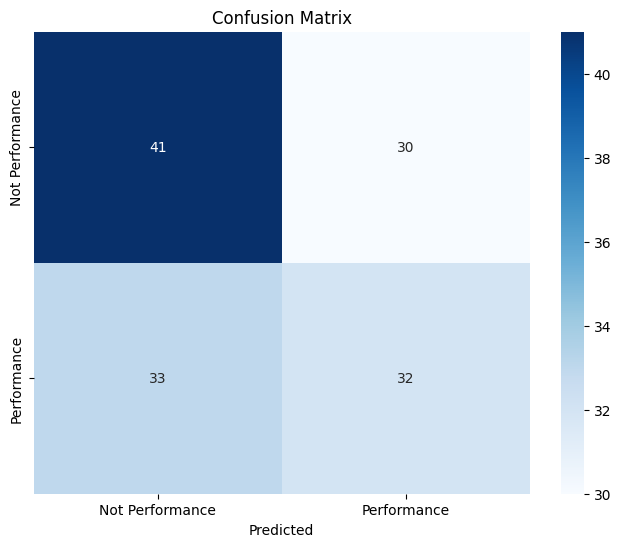

In [98]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Performance', 'Performance'], yticklabels=['Not Performance', 'Performance'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')

In [50]:
#Predictions with the Loaded Model
sample_data = X_test.iloc[:5]  # Sample data for prediction
predictions = loaded_models.predict(sample_data)
predictions = np.round(predictions)  # Round predictions to nearest integer
predictions_df = pd.DataFrame(predictions, columns=['Predicted Performance'])
predictions_df['Actual Performance'] = y_test.iloc[:5].values
predictions_df['Correct Prediction'] = predictions_df['Predicted Performance'] == predictions_df['Actual Performance']
predictions_df



,Predicted Performance,Actual Performance,Correct Prediction
0,4.0,4,True
1,3.0,3,True
2,4.0,4,True
3,4.0,4,True
4,3.0,3,True
